In [1]:
%matplotlib notebook

# 9.1 简明matplotlib API入门

In [2]:
import matplotlib.pyplot as plt
import numpy as np
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


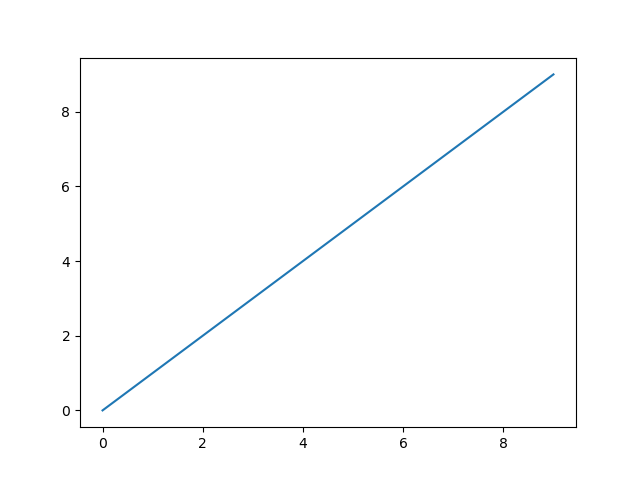

In [3]:
plt.plot(data)

## 9.1.1 图片与子图

<IPython.core.display.Javascript object>


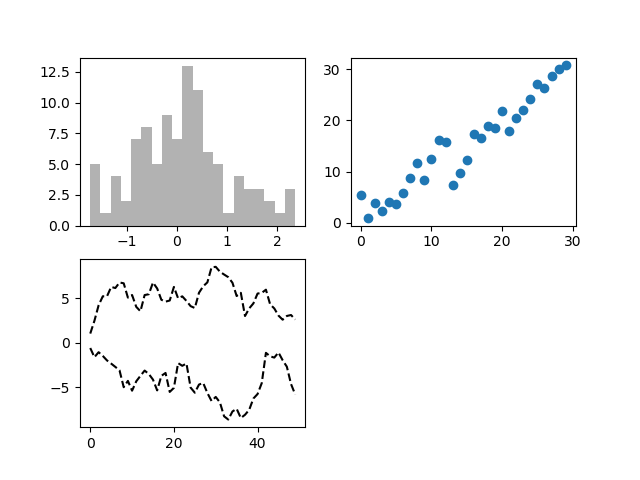

In [4]:
fig = plt.figure()

In [5]:
ax1 = fig.add_subplot(2,2,1)

In [6]:
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

In [8]:
plt.plot(np.random.randn(50).cumsum(),'k--')

In [9]:
_ = ax1.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)

In [10]:
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

### 9.1.1.1 调整子图周围的间距

<IPython.core.display.Javascript object>


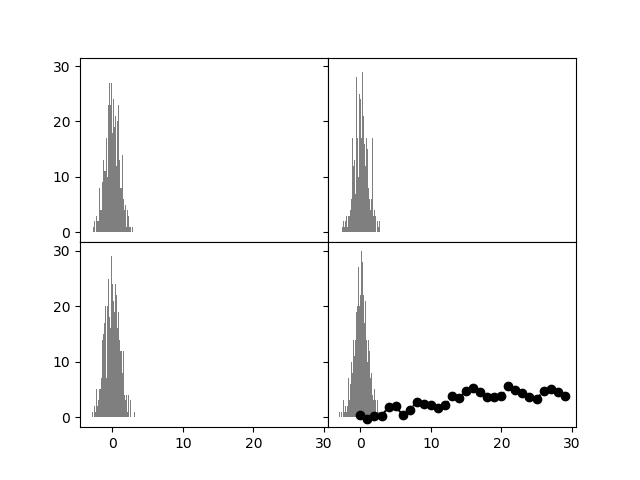

In [12]:
fig,axes = plt.subplots(2,2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='k',alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0)

## 9.1.2 颜色、标记和线类型

In [13]:
from numpy.random import randn
plt.plot(randn(30).cumsum(),'ko--')

## 9.1.3 刻度、标签和图例

<IPython.core.display.Javascript object>


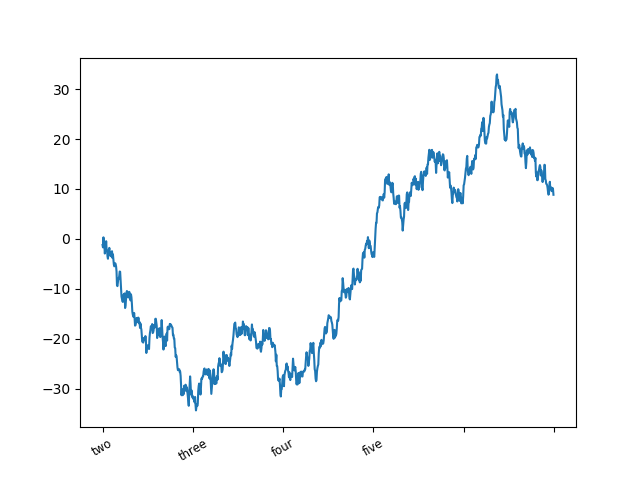

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

In [15]:
labels = ax.set_xticklabels(['one','two','three','four','five'],
                           rotation=30,fontsize='small')

### 9.1.3.2 添加图例

In [16]:
from numpy.random import randn

<IPython.core.display.Javascript object>


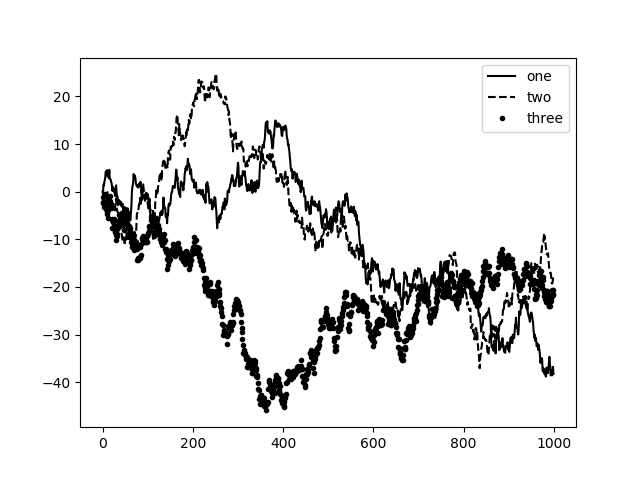

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

In [19]:
ax.plot(randn(1000).cumsum(),'k',label='one')

In [20]:
ax.plot(randn(1000).cumsum(),'k--',label='two')

In [21]:
ax.plot(randn(1000).cumsum(),'k.',label='three')

In [22]:
ax.legend(loc='best')

## 9.1.4 注释与子图加工

<IPython.core.display.Javascript object>


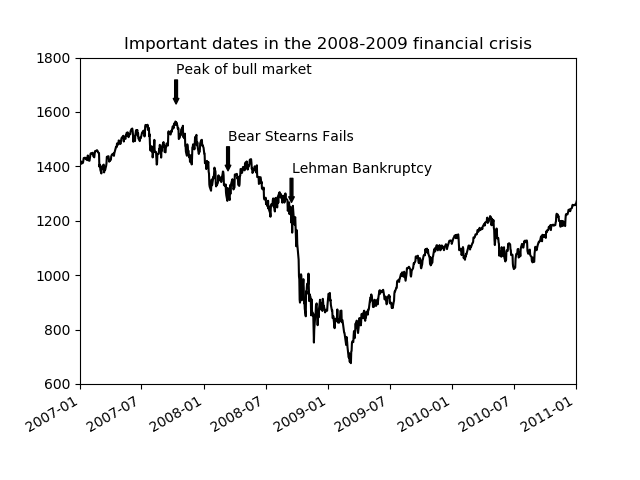

In [26]:
from datetime import datetime
import pandas as pd
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data = pd.read_csv('examples/spx.csv',index_col=0,parse_dates=True)
spx=data['SPX']
spx.plot(ax=ax,style='k-')
crisis_data = [
    (datetime(2007,10,11),'Peak of bull market'),
    (datetime(2008,3,12),'Bear Stearns Fails'),
    (datetime(2008,9,15),'Lehman Bankruptcy'),
]
for date,label in crisis_data:
    ax.annotate(label,xy=(date,spx.asof(date)+75),
               xytext=(date,spx.asof(date)+225),
               arrowprops=dict(facecolor='black',headwidth=4,width=2,headlength=4),
               horizontalalignment='left',verticalalignment='top')

In [27]:
ax.set_xlim(['1/1/2007','1/1/2011'])
ax.set_ylim([600,1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

Text(0.5,1,'Important dates in the 2008-2009 financial crisis')

<IPython.core.display.Javascript object>


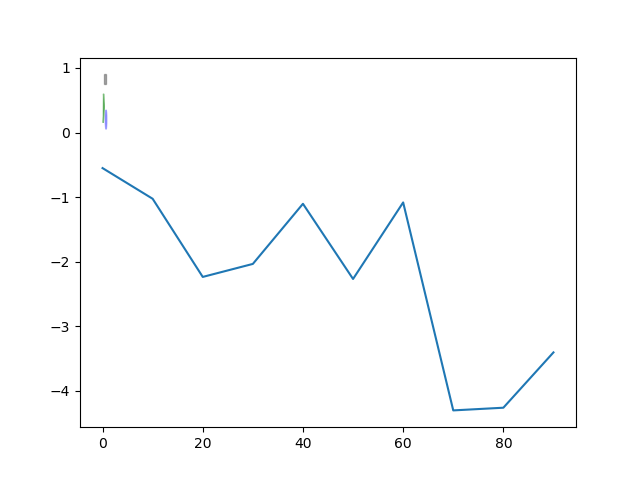

In [28]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

In [29]:
rect = plt.Rectangle((0.2,0.75),0.4,0.15,color='k',alpha=0.3)
circ = plt.Circle((0.7,0.2),0.15,color='b',alpha=0.3)
pgon = plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]],
                  color='g',alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## 9.1.5 将图片保存到文件

In [30]:
plt.savefig('figpath.svg')

In [31]:
 plt.savefig('figpath.png',dpi=400,bbox_inches='tight')

## 9.1.6 matplotlib设置

In [32]:
plt.rc('figure',figsize=(10,10))

# 9.2 使用pandas和seaborn绘图

## 9.2.1 折线图

In [34]:
s = pd.Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))
s.plot()

<IPython.core.display.Javascript object>


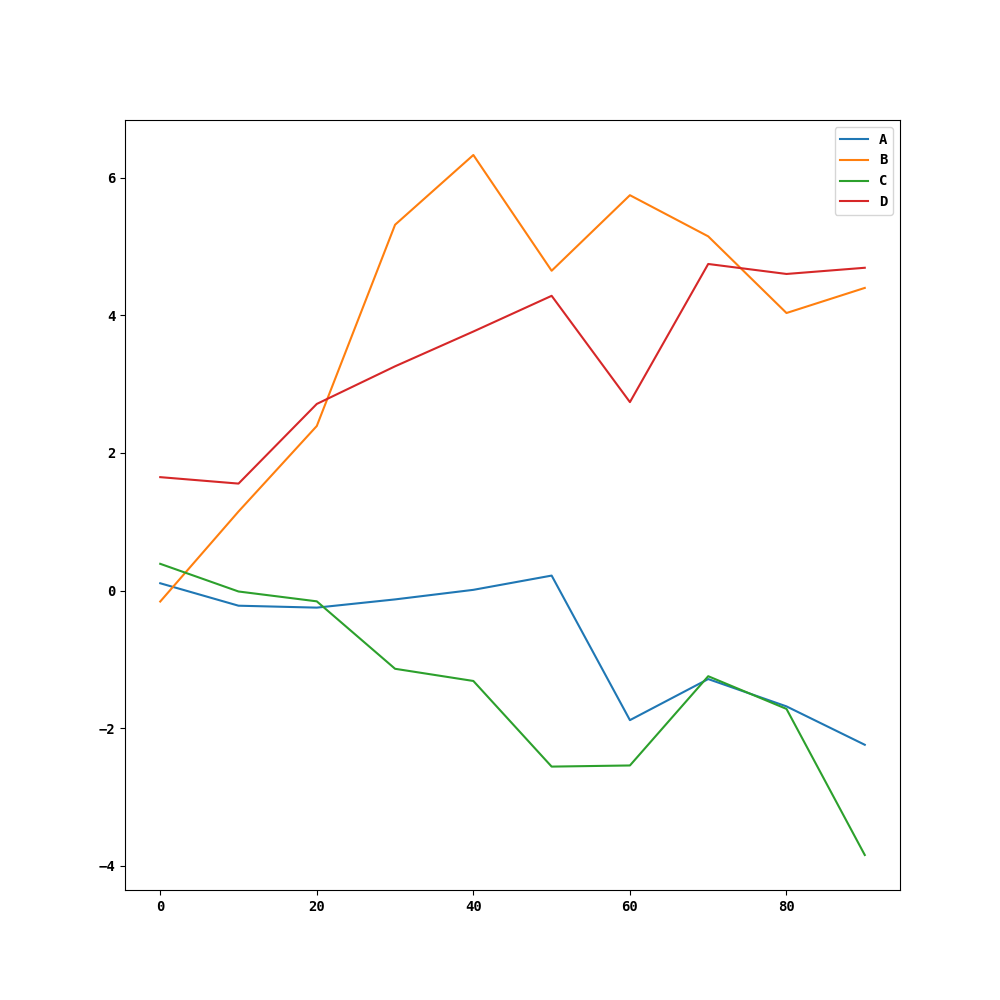

In [36]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
              columns=['A','B','C','D'],
              index=np.arange(0,100,10))
df.plot()

## 9.2.2 柱状图

<IPython.core.display.Javascript object>


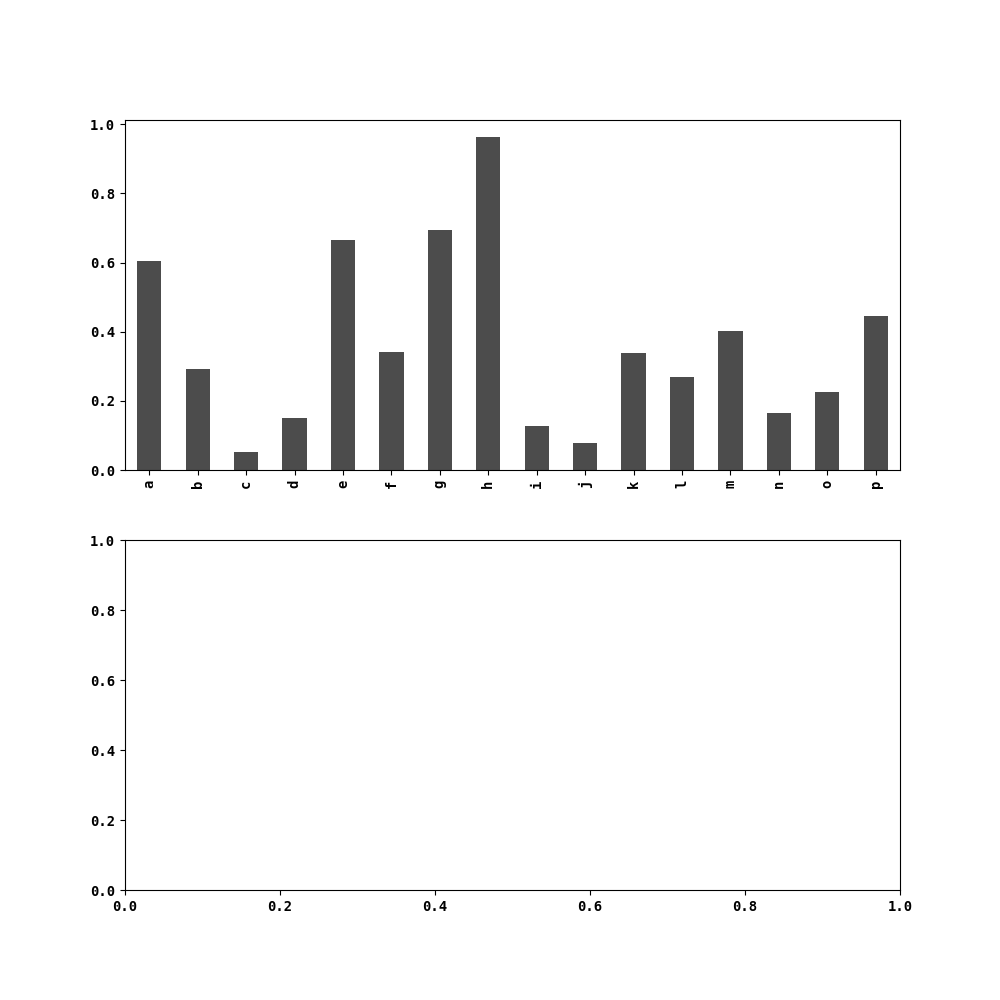

In [37]:
fig,axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16),index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0],color='k',alpha=0.7)

In [39]:
df = pd.DataFrame(np.random.rand(6,4),
            index=['one','two','three','four','five','six'],
            columns=pd.Index(['A','B','C','D'],name='Genus'))
df

Genus,A,B,C,D
one,0.427559,0.380557,0.926127,0.927595
two,0.126938,0.386433,0.700276,0.705171
three,0.835440,0.417520,0.902117,0.374002
four,0.917696,0.801750,0.009648,0.006026
five,0.335509,0.240435,0.291177,0.854959
six,0.415532,0.178940,0.283745,0.505016


<IPython.core.display.Javascript object>


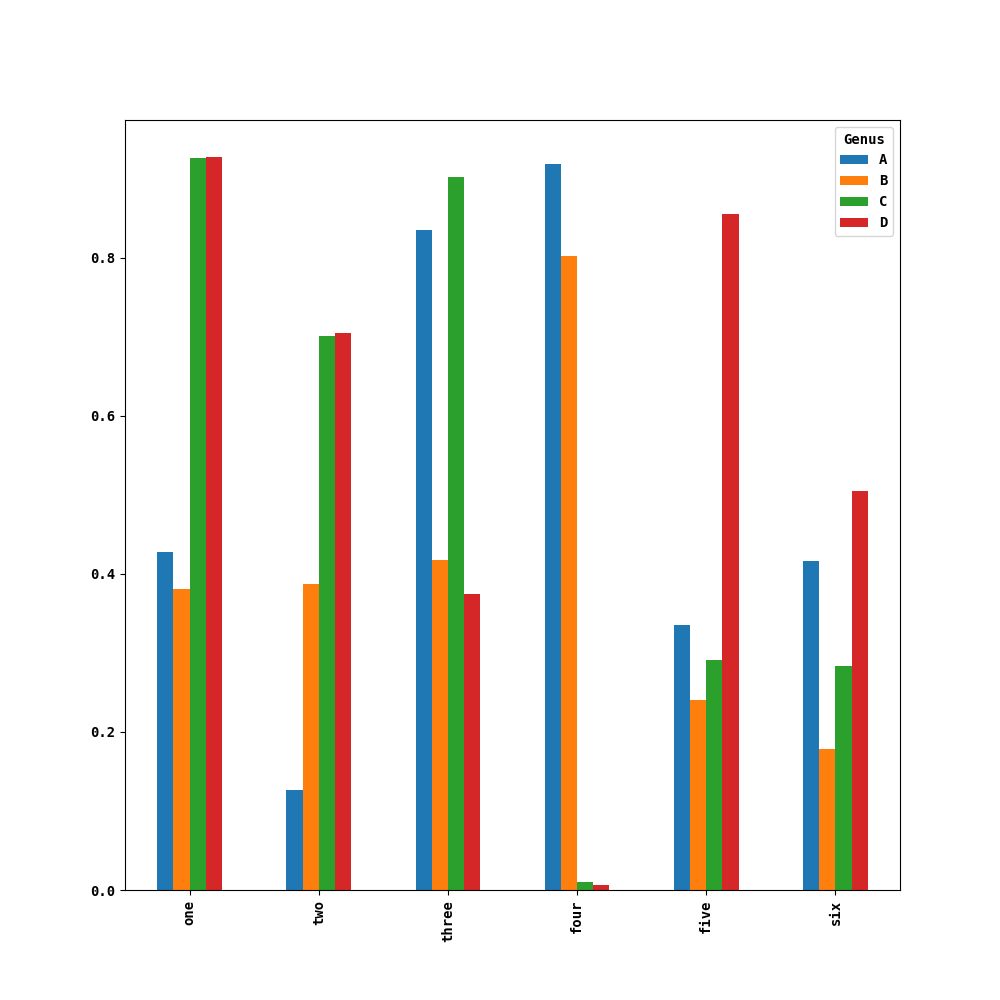

In [40]:
df.plot.bar()

<IPython.core.display.Javascript object>


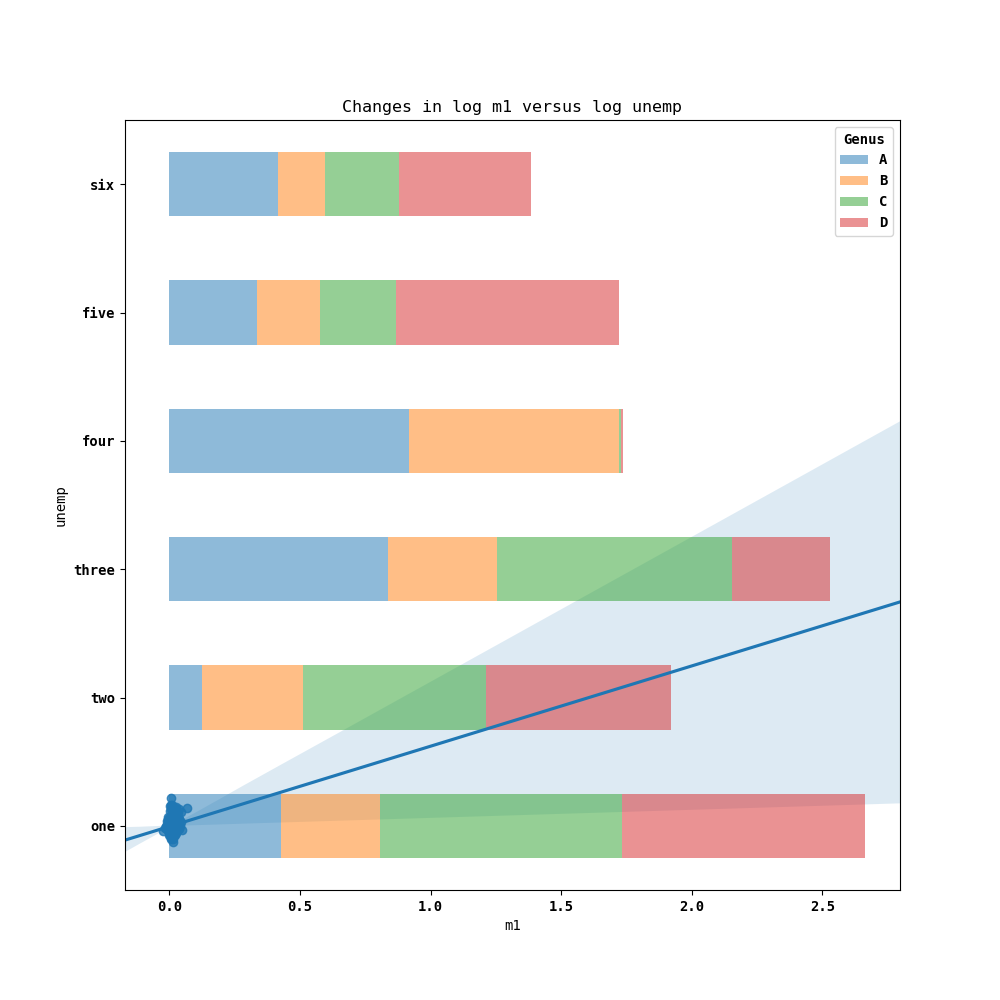

In [41]:
df.plot.barh(stacked=True,alpha=0.5)

## 9.2.3 散点图或点图

In [46]:
import seaborn as sns
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi','m1','tbilrate','unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [47]:
sns.regplot('m1','unemp',data=trans_data)

C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<IPython.core.display.Javascript object>


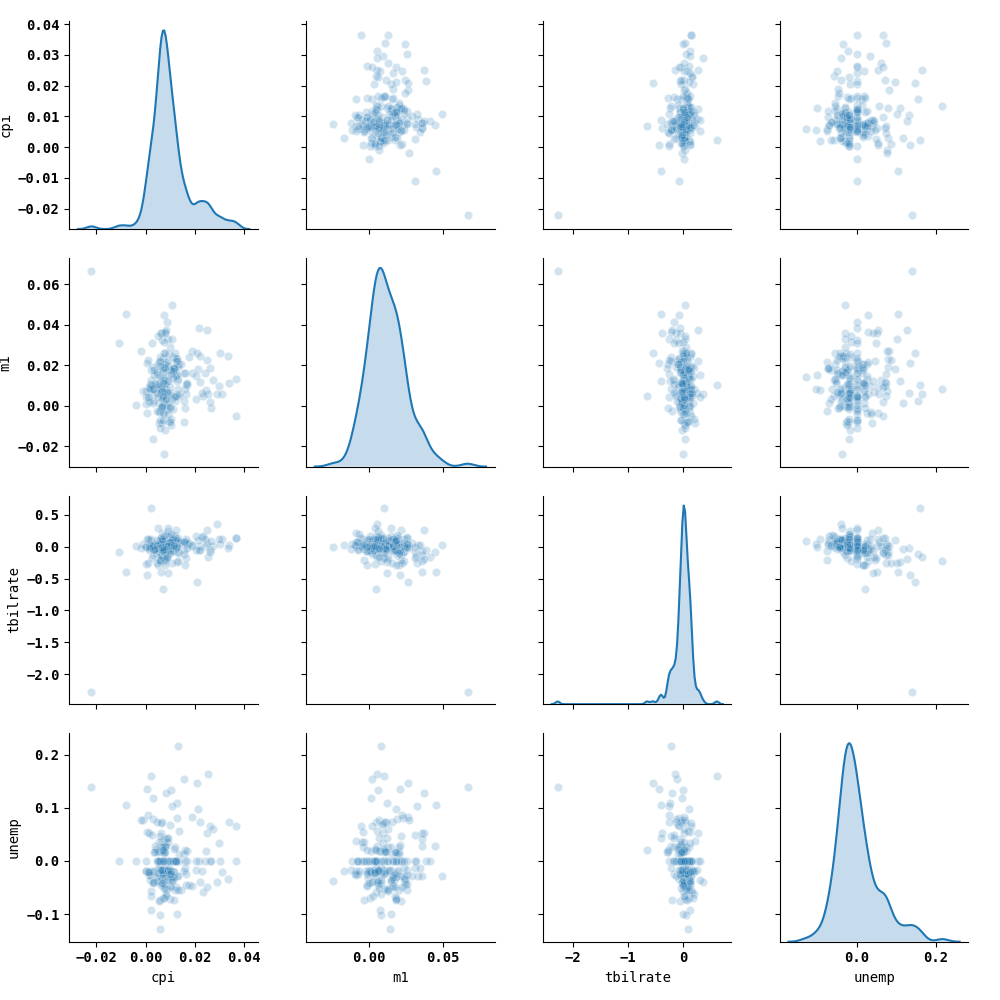

In [48]:
plt.title('Changes in log %s versus log %s'%('m1','unemp'))
sns.pairplot(trans_data,diag_kind='kde',plot_kws={'alpha':0.2})

## 9.2.4 分面网格和分类数据

In [49]:
sns.factorplot(x='day',y='tip.pct',hue='time',col='smoker',
              kind='bar',data=tips[tips.tip_pct<1])

AttributeError: 'DataFrame' object has no attribute 'tip_pct'